In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import re
from collections import deque
import datetime
from wordcloud import WordCloud
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. 파일호출

In [2]:
# 파일 불러오기
with open('../../data/df_wl.pkl', 'rb') as f:
    df_wl = pickle.load(f)


In [3]:
df_wl['wl_list'] = df_wl['over4'].apply(lambda x : [len(w) for w in x])

In [36]:
df_wl['wl_6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) ==6])
df_wl['over6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=6])
df_wl['over7'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=7])
df_wl['over8'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=8])


/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_91469/207577571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['wl_6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) ==6])
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_91469/207577571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['over6'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=6])
/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_91469/207577571.py:3: SettingWithCopyWarni

In [5]:
df_wl['wl_6_len'] = df_wl['wl_6'].apply(lambda x : len(x) )
df_wl['wl_over6_len'] = df_wl['over6'].apply(lambda x : len(x) )

In [6]:
df_wl['c_date'] = pd.to_datetime(df_wl['creationdate']).dt.date

In [7]:
gpt_date = datetime.date(2022,11,30)


In [8]:
df_wl['diff_day'] = df_wl['c_date'].values - gpt_date
df_wl['diff_day'] = df_wl['diff_day'].dt.days
# - gpt_date
# -gpt_date

In [9]:
df_wl['diff_week'] = df_wl['diff_day'].apply(lambda x  : math.ceil(x/7))

In [10]:
df_wl['diff_week'].max()

53

In [11]:
df_wl

,id,creationdate,body_prep,over4,wl_list,wl_6,over6,wl_6_len,wl_over6_len,c_date,diff_day,diff_week
0,77368423,2023-10-26 15:34:53.830,If all machines are on the same LAN then you c...,"[machines, instructs, Xdebug, connect, address...","[8, 9, 6, 7, 7, 6, 7, 10, 7, 7, 8, 6, 5, 10, 5...","[Xdebug, header, Xdebug, listen, Xdebug, eithe...","[machines, instructs, Xdebug, connect, address...",15,68,2023-10-26,330,48
1,77401389,2023-11-01 08:52:42.577,I am trying to automate a webpage using Seleni...,"[trying, automate, webpage, using, Selenium, h...","[6, 8, 7, 5, 8, 8, 7, 5, 5, 5, 5, 7, 10, 8, 14...","[trying, cannot, upload, upload, AutoIt]","[trying, automate, webpage, Selenium, headless...",5,21,2023-11-01,336,48
2,77389520,2023-10-30 14:32:47.247,I want to run a macro if a cell changes based ...,"[macro, changes, based, changed, value, instan...","[5, 7, 5, 7, 5, 8, 6, 7, 5, 5, 11, 11, 11, 5, ...","[column, change, Namely, unique, occurs, colum...","[changes, changed, instance, column, already, ...",7,28,2023-10-30,334,48
3,77389551,2023-10-30 14:36:20.843,Whilst you could write your own wrapper for I...,"[Whilst, could, write, wrapper, would, probabl...","[6, 5, 5, 7, 5, 8, 7, 6, 7]","[Whilst, vector]","[Whilst, wrapper, probably, mapping, vector, f...",2,6,2023-10-30,334,48
4,77344034,2023-10-23 09:20:47.107,I am using ASPNET Identity The login app is NE...,"[using, ASPNET, Identity, login, themselves, f...","[5, 6, 8, 5, 10, 8, 7, 5, 5, 47, 11, 13, 7, 13...","[ASPNET, enough, claims, cookie, larger, doesn...","[ASPNET, Identity, themselves, followed, artic...",7,25,2023-10-23,327,47
...,...,...,...,...,...,...,...,...,...,...,...,...
43417095,70631775,2022-01-08 11:12:48.283,To change particle amp background colour you n...,"[change, particle, background, colour, adjust,...","[6, 8, 10, 6, 6, 5, 6, 12, 7, 6, 8, 7, 6, 5, 8...","[change, colour, adjust, values, config, adjus...","[change, particle, background, colour, adjust,...",10,25,2022-01-08,-326,-46
43417096,70598711,2022-01-05 19:38:07.140,you need to tell spring how to route your requ...,"[spring, route, requestby, default, spring, fi...","[6, 5, 9, 7, 6, 6, 10, 9, 121, 5, 9, 8, 6, 6, ...","[spring, spring, figure, create, should, revie...","[spring, requestby, default, spring, figure, p...",7,19,2022-01-05,-329,-47
43417097,70587610,2022-01-05 03:50:11.433,Issue and workaroundI think that in the curren...,"[Issue, workaroundI, think, current, stage, ca...","[5, 11, 5, 7, 5, 6, 8, 8, 8, 10, 7, 5, 9, 12, ...","[cannot, sample, dialog, Google, Google, opene...","[workaroundI, current, cannot, directly, achie...",29,66,2022-01-05,-329,-47
43417098,70572188,2022-01-03 22:37:26.197,The code Should work like thisread a character...,"[Should, thisread, character, input, uppercase...","[6, 8, 9, 5, 9, 12, 7, 5, 9, 9, 7, 9, 10, 8, 6...","[Should, newest, letter, should]","[Should, thisread, character, uppercase, Lette...",4,22,2022-01-03,-331,-47


In [12]:
# 당일 제외하자
df_wl = df_wl[df_wl['diff_day'] !=0]

In [13]:
df_wl['q_treat'] = np.where(df_wl['diff_day']>0, 1, 0)

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_91469/3975482473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl['q_treat'] = np.where(df_wl['diff_day']>0, 1, 0)


In [ ]:
# bf treatment start 2021-10-01T00:00:32Z
# bf treatment end 2022-03-19T23:59:47Z
# ======================================================== emergence of chatGPT : 2022-11-30
# af treatment start 2022-10-01T00:01:15Z
# af treatment end 2023-03-19T23:58:53Z

In [44]:
(df_wl['creationdate']>='2021-10-01')

0           True
1           True
2           True
3           True
4           True
            ... 
43417095    True
43417096    True
43417097    True
43417098    True
43417099    True
Name: creationdate, Length: 5351091, dtype: bool

In [14]:
model = smf.ols('wl_over6_len ~ C(diff_week, Treatment(reference=-53)) * q_treat', data=df_wl).fit(cov_type='HC1')

In [15]:
coefs = pd.DataFrame({
    'Estimate': model.params,
    'Std. Error': model.bse
})
coefs = coefs[coefs.index.str.contains('diff_week')]
coefs = coefs.reset_index()
coefs.columns = ['term', 'Estimate', 'Std. Error']


In [16]:
coefs

,term,Estimate,Std. Error
0,"C(diff_week, Treatment(reference=-53))[T.-52]",4.923441e+07,1.376757e+08
1,"C(diff_week, Treatment(reference=-53))[T.-51]",4.923441e+07,1.376757e+08
2,"C(diff_week, Treatment(reference=-53))[T.-50]",4.923441e+07,1.376757e+08
3,"C(diff_week, Treatment(reference=-53))[T.-49]",4.923441e+07,1.376757e+08
4,"C(diff_week, Treatment(reference=-53))[T.-48]",4.923441e+07,1.376757e+08
...,...,...,...
205,"C(diff_week, Treatment(reference=-53))[T.49]:q...",4.357133e+10,4.325763e+10
206,"C(diff_week, Treatment(reference=-53))[T.50]:q...",5.764182e+10,5.762513e+10
207,"C(diff_week, Treatment(reference=-53))[T.51]:q...",1.383772e+09,1.566441e+09
208,"C(diff_week, Treatment(reference=-53))[T.52]:q...",4.688955e+11,4.697768e+11


In [17]:
# 예를 들어 'C(q_rel_week, Treatment(reference=-8))[T.-7]:q_treat[T.True]'에서 숫자 부분을 추출
coefs['period'] = coefs['term'].str.extract(r'\[T\.(-?\d+)\]')[0].astype(int)


In [18]:
coefs['ll_95'] = coefs['Estimate'] - 1.965 * coefs['Std. Error']
coefs['ul_95'] = coefs['Estimate'] + 1.965 * coefs['Std. Error']

coefs_ = coefs.iloc[105:, :]

In [19]:
coefs_

,term,Estimate,Std. Error,period,ll_95,ul_95
105,"C(diff_week, Treatment(reference=-53))[T.-52]:...",2.563424e+06,2.154601e+06,-52,-1.670368e+06,6.797215e+06
106,"C(diff_week, Treatment(reference=-53))[T.-51]:...",-1.061069e+06,8.793730e+05,-51,-2.789037e+06,6.668991e+05
107,"C(diff_week, Treatment(reference=-53))[T.-50]:...",-8.657477e+05,7.647994e+05,-50,-2.368578e+06,6.370832e+05
108,"C(diff_week, Treatment(reference=-53))[T.-49]:...",-2.756756e+06,2.307693e+06,-49,-7.291372e+06,1.777861e+06
109,"C(diff_week, Treatment(reference=-53))[T.-48]:...",-3.969678e-05,5.886770e-05,-48,-1.553718e-04,7.597824e-05
...,...,...,...,...,...,...
205,"C(diff_week, Treatment(reference=-53))[T.49]:q...",4.357133e+10,4.325763e+10,49,-4.142991e+10,1.285726e+11
206,"C(diff_week, Treatment(reference=-53))[T.50]:q...",5.764182e+10,5.762513e+10,50,-5.559156e+10,1.708752e+11
207,"C(diff_week, Treatment(reference=-53))[T.51]:q...",1.383772e+09,1.566441e+09,51,-1.694285e+09,4.461830e+09
208,"C(diff_week, Treatment(reference=-53))[T.52]:q...",4.688955e+11,4.697768e+11,52,-4.542159e+11,1.392007e+12


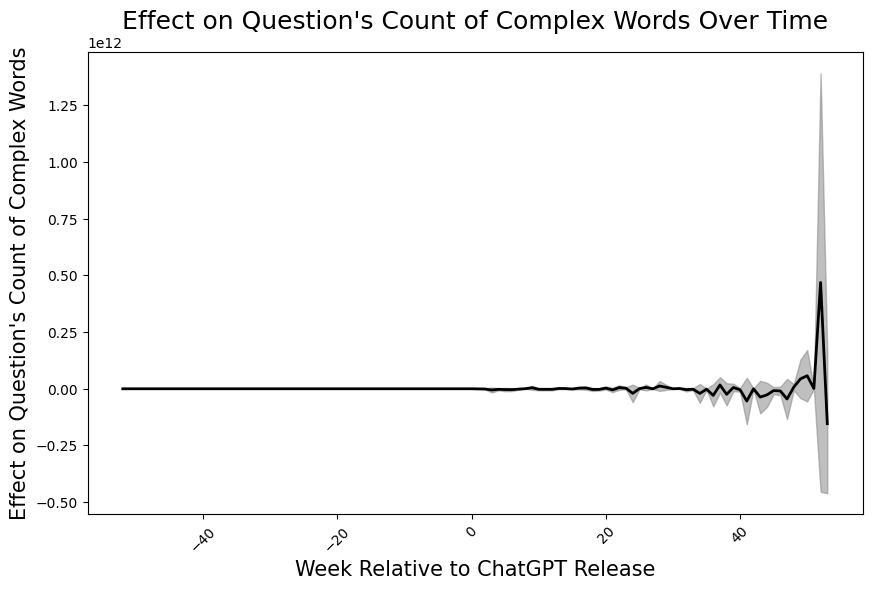

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='Estimate', data=coefs_, linewidth=2, color='black')
plt.fill_between(coefs_['period'], coefs_['ll_95'], coefs_['ul_95'], color='gray', alpha=0.5)
# sns.scatterplot(x='period', y='Estimate', data=coefs_, s=100, color='black')
# plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
# plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Week Relative to ChatGPT Release", fontsize=15)
plt.ylabel("Effect on Question's Count of Complex Words", fontsize=15)
plt.xticks(rotation=45)
plt.title("Effect on Question's Count of Complex Words Over Time", fontsize=18)
plt.show()


In [21]:
df_wl[df_wl['id'] ==75056565]

,id,creationdate,body_prep,over4,wl_list,wl_6,over6,wl_6_len,wl_over6_len,c_date,diff_day,diff_week,q_treat
19216757,75056565,2022-12-30 11:03:21.790,I want to remove key from dictionary but the o...,"[remove, dictionary, enters, written, gives, E...","[6, 10, 6, 7, 5, 5, 28, 10, 7, 6, 10, 7, 6, 5, 7]","[remove, enters, during, remove]","[remove, dictionary, enters, written, phoneNum...",4,12,2022-12-30,30,5,1


In [22]:
df_wl.loc[df_wl['id'] ==75056565, 'body_prep'].values

array(['I want to remove key from dictionary but the one user enters I have written this code but it gives me this Error for i in phoneNumberskeysRuntimeError dictionary changed size during iterationI know this one is correct but why cant i remove it while Im looping'],
      dtype=object)

In [23]:
df_wl.loc[df_wl['id'] ==75056565, 'over6'].values

array([list(['remove', 'dictionary', 'enters', 'written', 'phoneNumberskeysRuntimeError', 'dictionary', 'changed', 'during', 'iterationI', 'correct', 'remove', 'looping'])],
      dtype=object)

In [24]:
df_wl.tail(20)

,id,creationdate,body_prep,over4,wl_list,wl_6,over6,wl_6_len,wl_over6_len,c_date,diff_day,diff_week,q_treat
43417080,71479052,2022-03-15 08:24:28.767,You could use I slightly modified your code b...,"[could, slightly, modified, below]","[5, 8, 8, 5]",[],"[slightly, modified]",0,2,2022-03-15,-260,-37,0
43417081,71479890,2022-03-15 09:33:49.527,Your loop needs to iterate through all rows Cu...,"[needs, iterate, through, Currently, processes...","[5, 7, 7, 9, 9, 5, 5, 5, 9, 6, 7, 5, 9, 9, 5, 8]",[record],"[iterate, through, Currently, processes, infin...",1,10,2022-03-15,-260,-37,0
43417082,71446603,2022-03-12 02:54:06.933,Theres a good inheritance vs composition tutor...,"[Theres, inheritance, composition, tutorial, h...","[6, 11, 11, 8, 46, 5, 5, 7, 9, 5, 8, 10, 14, 1...","[Theres, paying, paying, within, record, assig...","[Theres, inheritance, composition, tutorial, h...",10,51,2022-03-12,-263,-37,0
43417083,71118517,2022-02-14 21:30:10.590,Is there a way to route the messagesservicebou...,"[there, route, messagesserviceboundfeedback, s...","[5, 5, 28, 7, 5, 5]",[],"[messagesserviceboundfeedback, service]",0,2,2022-02-14,-289,-41,0
43417084,71093142,2022-02-12 15:17:49.450,First I downloaded docker for windows 10 OS Bu...,"[First, downloaded, docker, windows, Built, 19...","[5, 10, 6, 7, 5, 5, 7, 5, 8, 6, 9, 5, 6, 7, 8,...","[docker, docker, docker, during, system, canno...","[downloaded, docker, windows, version, videobu...",9,34,2022-02-12,-291,-41,0
43417085,71088913,2022-02-12 04:04:40.343,Try to add your user to nginx group like,"[nginx, group]","[5, 5]",[],[],0,0,2022-02-12,-291,-41,0
43417086,71078390,2022-02-11 10:15:22.583,Im trying to deploy a Flask app in a container...,"[trying, deploy, Flask, container, MongoDB, in...","[6, 6, 5, 9, 7, 8, 5, 9, 6, 7, 10, 16, 10, 7, ...","[trying, deploy, having, lineAs, docker, figur...","[trying, deploy, container, MongoDB, instance,...",9,43,2022-02-11,-292,-41,0
43417087,71079246,2022-02-11 11:18:11.177,I have a singlecell RNAseq dataset It is a mat...,"[singlecell, RNAseq, dataset, matrix, 30561, g...","[10, 6, 7, 6, 5, 5, 5, 6, 6, 5, 8, 7, 5, 8, 6,...","[RNAseq, matrix, cellsI, subset, gt1000, repea...","[singlecell, RNAseq, dataset, matrix, cellsI, ...",9,42,2022-02-11,-292,-41,0
43417088,71054449,2022-02-09 17:56:27.370,this is a ionic angular project that im workin...,"[ionic, angular, project, working, using, ngla...","[5, 7, 7, 7, 5, 15, 6, 5, 9, 7, 6]","[plugin, errors]","[angular, project, working, nglazyloadimage, p...",2,8,2022-02-09,-294,-42,0
43417089,71043076,2022-02-09 01:52:00.010,With Kotlin DSL example you can add in your ta...,"[Kotlin, example, tasks, following, snippetwhe...","[6, 7, 5, 9, 12, 15, 5, 9, 17]",[Kotlin],"[Kotlin, example, following, snippetwhere, roo...",1,7,2022-02-09,-294,-42,0


In [ ]:
df_wl['over7'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=7])
df_wl['over8'] = df_wl['over4'].apply(lambda x : [w for w in x if len(w) >=8])

In [37]:
arr6 = [] 
arr7 = [] 
arr8 = [] 
[arr6.extend(x) for x in df_wl['over6']]
[arr7.extend(x) for x in df_wl['over7']]
[arr8.extend(x) for x in df_wl['over8']]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [30]:
arr

['machines',
 'instructs',
 'Xdebug',
 'connect',
 'address',
 'header',
 'instead',
 'configured',
 'address',
 'through',
 'Remember',
 'Xdebug',
 'connection',
 'listen',
 'incoming',
 'debugging',
 'connections',
 'singleuser',
 'connectionsRequesting',
 'scriptapplication',
 'through',
 'browser',
 'Xdebug',
 'activated',
 'either',
 'through',
 'browser',
 'extension',
 'enough',
 'Xdebug',
 'server',
 'address',
 'machine',
 'initiated',
 'request',
 'Xdebug',
 'always',
 'connect',
 'configured',
 'address',
 'machine',
 'running',
 'browserIf',
 'server',
 'network',
 'dbgpProxy',
 'PHPXdebug',
 'connect',
 'configure',
 'forward',
 'incoming',
 'request',
 'explaining',
 'greater',
 'detail',
 'httpswwwyoutubecomwatchv3RkGZKUC8ampfeatureyoutubeNeither',
 'dbgpProxy',
 'methods',
 'anything',
 'neither',
 'abovementioned',
 'methods',
 'alternatively',
 'Xdebug',
 'allows',
 'debugging',
 'complicated',
 'scenarios',
 'trying',
 'automate',
 'webpage',
 'Selenium',
 'headless'

In [38]:
arr6_str = ' '.join(arr6)
arr7_str = ' '.join(arr7)
arr8_str = ' '.join(arr8)

In [39]:
wc6 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud6 = wc6.generate(arr6_str)

In [40]:
wc7 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud7 = wc7.generate(arr7_str)

In [41]:
wc8 = WordCloud(background_color='white', width= 800, height = 600, max_words = 200)
cloud8 = wc8.generate(arr8_str)

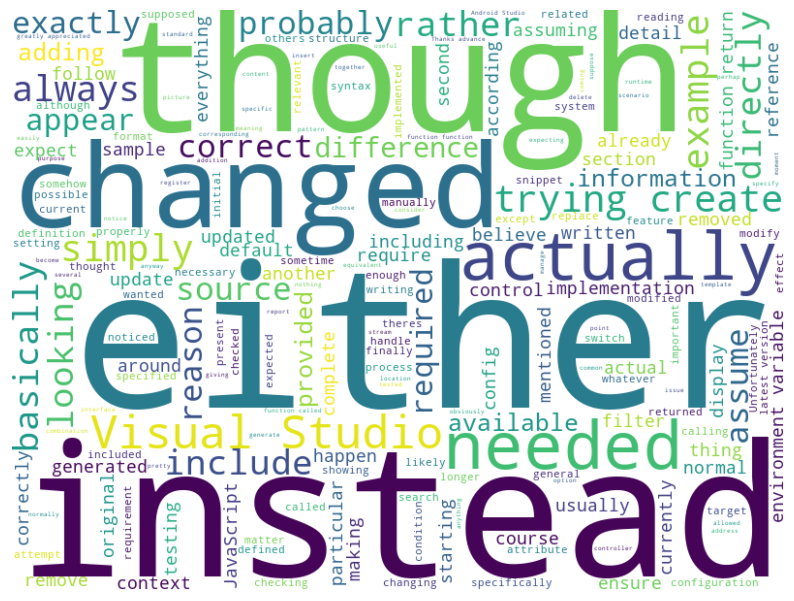

In [35]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud6, interpolation='bilinear')

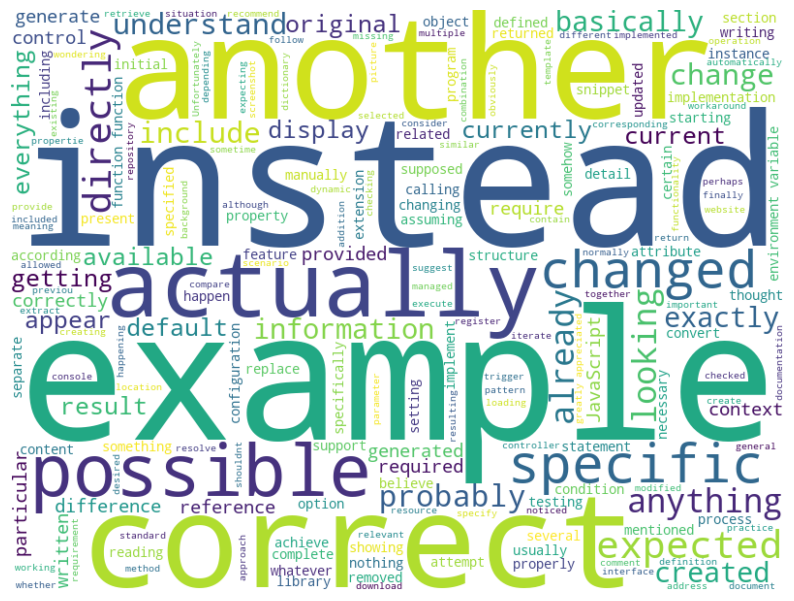

In [42]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud7, interpolation='bilinear')

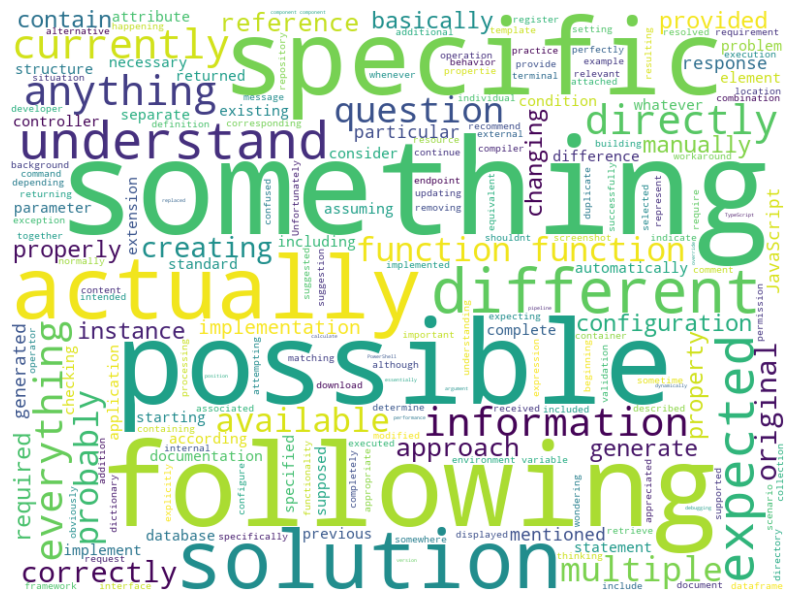

In [43]:
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(cloud8, interpolation='bilinear')

In [32]:
wordcloud = WordCloud().generate(arr_str)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)   # wordcloud 객체를 넣으면 워드클라우드 형태의 그래프 생성
plt.axis('off')  #눈금 삭제 
plt.show()